In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


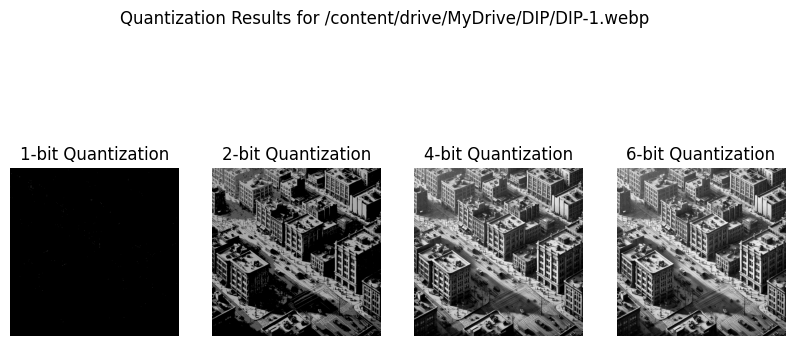

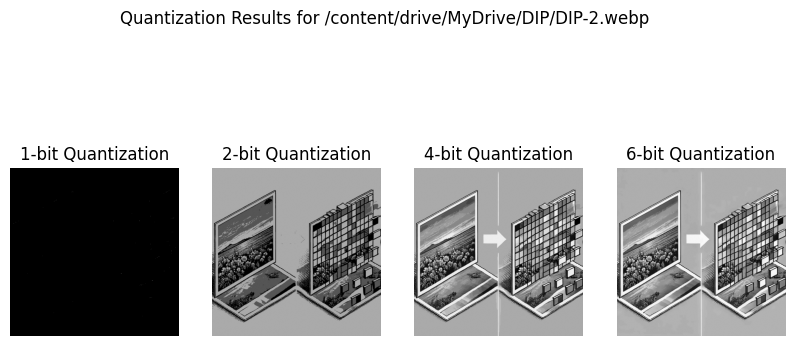

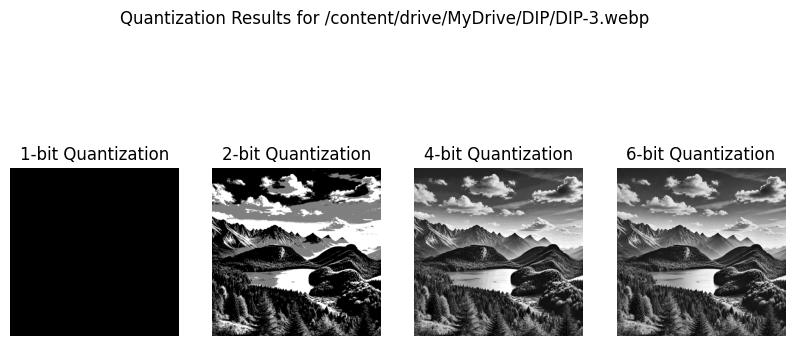

In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def quantize_image(image_path, bit_depth):
    """
    Perform intensity-level quantization on a grayscale image.

    Parameters:
        image_path (str): Path to the input image.
        bit_depth (int): Target bit depth (1-8).

    Returns:
        quantized_image (numpy.ndarray): Quantized image.
    """
    # Read the grayscale image
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

    # Ensure the bit depth is valid
    if bit_depth < 1 or bit_depth > 8:
        raise ValueError("Bit depth must be between 1 and 8")
    # Compute the number of intensity levels
    num_levels = 2 ** bit_depth

    # Perform quantization
    quantized_image = np.floor(image / 255 * (num_levels - 1)) * (255 / (num_levels - 1))
    quantized_image = quantized_image.astype(np.uint8)

    return quantized_image

# List of image paths
image_paths = ["/content/drive/MyDrive/DIP/DIP-1.webp", "/content/drive/MyDrive/DIP/DIP-2.webp", "/content/drive/MyDrive/DIP/DIP-3.webp"]  # Replace with your image paths
bit_depths = [1, 2, 4, 6]

# Loop through each image and apply quantization
for image_path in image_paths:
    plt.figure(figsize=(10, 5))
    for i, b in enumerate(bit_depths):
        quantized_img = quantize_image(image_path, b)
        plt.subplot(1, len(bit_depths), i+1)
        plt.imshow(quantized_img, cmap='gray')
        plt.title(f"{b}-bit Quantization")
        plt.axis('off')

    plt.suptitle(f"Quantization Results for {image_path}")
    plt.show()

In [5]:
import time

# Measure execution time for quantization
for image_path in image_paths:
    print(f"Processing {image_path}")
    for b in bit_depths:
        start_time = time.time()
        quantized_img = quantize_image(image_path, b)
        end_time = time.time()
        print(f"Bit Depth: {b}-bit, Execution Time: {end_time - start_time:.4f} seconds")

Processing /content/drive/MyDrive/DIP/DIP-1.webp
Bit Depth: 1-bit, Execution Time: 0.0735 seconds
Bit Depth: 2-bit, Execution Time: 0.0593 seconds
Bit Depth: 4-bit, Execution Time: 0.0772 seconds
Bit Depth: 6-bit, Execution Time: 0.0587 seconds
Processing /content/drive/MyDrive/DIP/DIP-2.webp
Bit Depth: 1-bit, Execution Time: 0.0411 seconds
Bit Depth: 2-bit, Execution Time: 0.0422 seconds
Bit Depth: 4-bit, Execution Time: 0.0439 seconds
Bit Depth: 6-bit, Execution Time: 0.0424 seconds
Processing /content/drive/MyDrive/DIP/DIP-3.webp
Bit Depth: 1-bit, Execution Time: 0.0670 seconds
Bit Depth: 2-bit, Execution Time: 0.0549 seconds
Bit Depth: 4-bit, Execution Time: 0.0557 seconds
Bit Depth: 6-bit, Execution Time: 0.0574 seconds


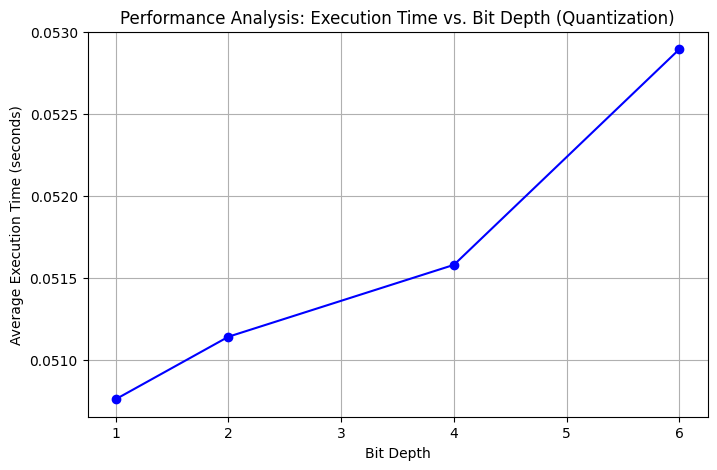

In [7]:
import time
import matplotlib.pyplot as plt

# Function to measure execution time for quantization
def measure_quantization_time(image_paths, bit_depths):
    execution_times = {b: [] for b in bit_depths}  # Dictionary to store execution times

    for image_path in image_paths:
        for b in bit_depths:
            start_time = time.time()
            quantize_image(image_path, b)  # Perform quantization
            end_time = time.time()
            execution_times[b].append(end_time - start_time)  # Store execution time

    # Calculate average execution time for each bit depth
    avg_execution_times = {b: np.mean(times) for b, times in execution_times.items()}

    return avg_execution_times

# Measure execution times
avg_execution_times = measure_quantization_time(image_paths, bit_depths)

# Plot the graph
plt.figure(figsize=(8, 5))
plt.plot(list(avg_execution_times.keys()), list(avg_execution_times.values()), marker='o', linestyle='-', color='b')
plt.xlabel('Bit Depth')
plt.ylabel('Average Execution Time (seconds)')
plt.title('Performance Analysis: Execution Time vs. Bit Depth (Quantization)')
plt.grid(True)
plt.show()

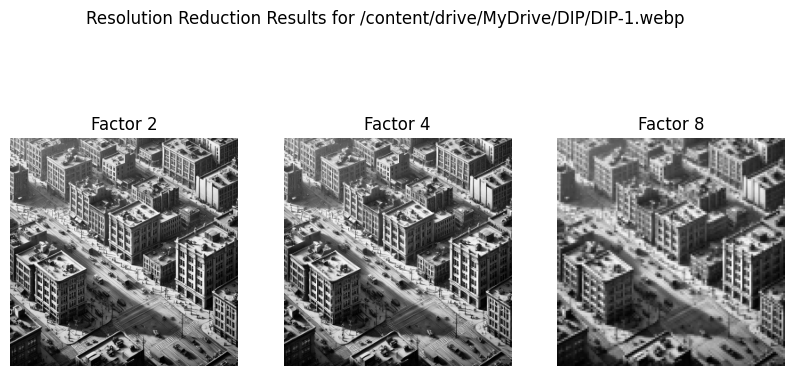

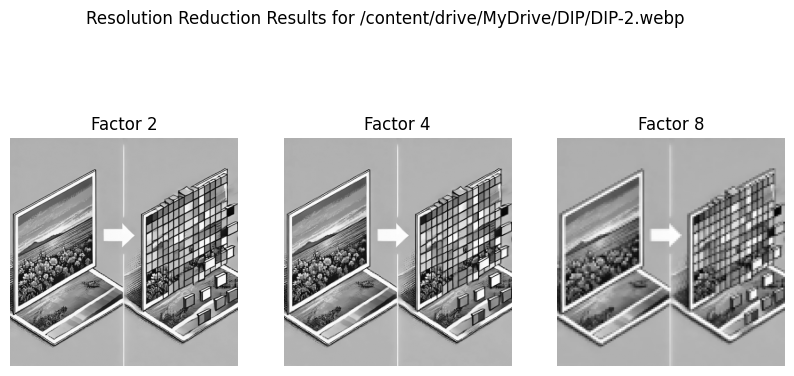

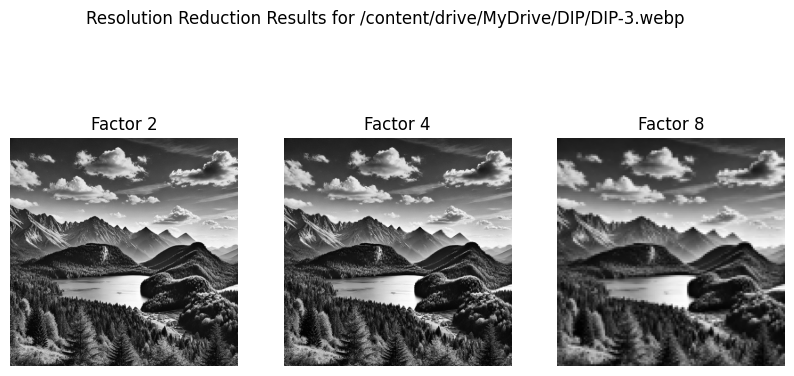

In [4]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def reduce_resolution(image_path, factor):
    """
    Reduce the spatial resolution of a grayscale image.

    Parameters:
        image_path (str): Path to the input image.
        factor (int): Reduction factor (e.g., 2, 4, 8).

    Returns:
        reduced_image (numpy.ndarray): Image with reduced spatial resolution.
    """
    # Read the grayscale image
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

    if factor < 1:
        raise ValueError("Reduction factor must be greater than or equal to 1")

    # Get the new dimensions
    height, width = image.shape
    new_height, new_width = height // factor, width // factor

    # Resize using block averaging
    reduced_image = cv2.resize(image, (new_width, new_height), interpolation=cv2.INTER_AREA)

    return reduced_image

# List of image paths
image_paths = ["/content/drive/MyDrive/DIP/DIP-1.webp", "/content/drive/MyDrive/DIP/DIP-2.webp", "/content/drive/MyDrive/DIP/DIP-3.webp"]  # Replace with your image paths
reduction_factors = [2, 4, 8]

# Loop through each image and apply resolution reduction
for image_path in image_paths:
    plt.figure(figsize=(10, 5))
    for i, f in enumerate(reduction_factors):
        reduced_img = reduce_resolution(image_path, f)
        plt.subplot(1, len(reduction_factors), i+1)
        plt.imshow(reduced_img, cmap='gray')
        plt.title(f"Factor {f}")
        plt.axis('off')

    plt.suptitle(f"Resolution Reduction Results for {image_path}")
    plt.show()

In [6]:
# Measure execution time for resolution reduction
for image_path in image_paths:
    print(f"Processing {image_path}")
    for f in reduction_factors:
        start_time = time.time()
        reduced_img = reduce_resolution(image_path, f)
        end_time = time.time()
        print(f"Reduction Factor: {f}x, Execution Time: {end_time - start_time:.4f} seconds")

Processing /content/drive/MyDrive/DIP/DIP-1.webp
Reduction Factor: 2x, Execution Time: 0.0590 seconds
Reduction Factor: 4x, Execution Time: 0.0483 seconds
Reduction Factor: 8x, Execution Time: 0.0465 seconds
Processing /content/drive/MyDrive/DIP/DIP-2.webp
Reduction Factor: 2x, Execution Time: 0.0293 seconds
Reduction Factor: 4x, Execution Time: 0.0341 seconds
Reduction Factor: 8x, Execution Time: 0.0296 seconds
Processing /content/drive/MyDrive/DIP/DIP-3.webp
Reduction Factor: 2x, Execution Time: 0.0454 seconds
Reduction Factor: 4x, Execution Time: 0.0429 seconds
Reduction Factor: 8x, Execution Time: 0.0488 seconds


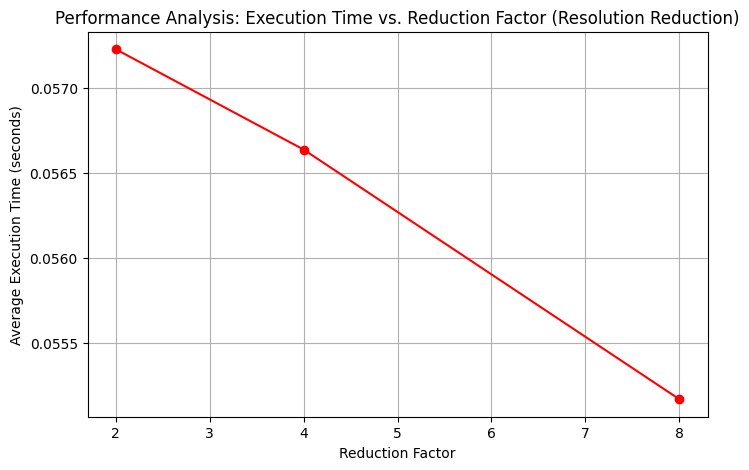

In [8]:
# Function to measure execution time for resolution reduction
def measure_resolution_reduction_time(image_paths, reduction_factors):
    execution_times = {f: [] for f in reduction_factors}  # Dictionary to store execution times

    for image_path in image_paths:
        for f in reduction_factors:
            start_time = time.time()
            reduce_resolution(image_path, f)  # Perform resolution reduction
            end_time = time.time()
            execution_times[f].append(end_time - start_time)  # Store execution time

    # Calculate average execution time for each reduction factor
    avg_execution_times = {f: np.mean(times) for f, times in execution_times.items()}

    return avg_execution_times

# Measure execution times
avg_execution_times = measure_resolution_reduction_time(image_paths, reduction_factors)

# Plot the graph
plt.figure(figsize=(8, 5))
plt.plot(list(avg_execution_times.keys()), list(avg_execution_times.values()), marker='o', linestyle='-', color='r')
plt.xlabel('Reduction Factor')
plt.ylabel('Average Execution Time (seconds)')
plt.title('Performance Analysis: Execution Time vs. Reduction Factor (Resolution Reduction)')
plt.grid(True)
plt.show()